# S13 Group 8: Project - Phase 1

## Members:
- Ano, Joseph Thomas M.
- Limjoco, Jared Ethan D. 
- Nadela, Cymon Radjh O.

In this Notebook, we will be using the [League of Legends Worlds 2021 Main Event - Champion Stats](https://www.kaggle.com/datasets/vincentbarletta/league-of-legends-worlds-champion-pb-dataset?select=Worlds+2021+Main+Event+-+Champion+Stats+-+OraclesElixir.csv). The notebook will cover four main parts namely the **dataset description**, **data cleaning**, the **exploratory data analysis questions**, and the group's **proposed research questions**. 



## Data Set Description

### Brief description of dataset
This data set contains the list of every champion either picked or banned during the 2021 League of Legends World tournament. As metioned in its kaggle page, the main statistics of this particular data set include the champion name, position, pick rate, ban rate, pick+ban rate, and more individual champion statistics (Kill, Death, Assist, KDA rate, etc). Each column also has a breif description explaining the variable.

### Description of the data collection process
The data was collected from a popular website called [Oracle's Elixir](https://oracleselixir.com/about), the premier source for advance League of Legends esports statistics and was posted on kaggle by the user Vincent Barletta. All of the data comes from the analysts and data scrapers at Oracles Elixir who retrive the data from several sources including including Match History pages, [lolesports.com](https://lolesports.com), [lpl.QQ.com](https://lpl.qq.com), [Leaguepedia](https://lol.fandom.com/wiki/League_of_Legends_Esports_Wiki), the Riot Games solo queue APIs, and more 

### Structure of the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sets the theme of the charts
#plt.style.use('seaborn-darkgrid')

%matplotlib inline

In [2]:
lol_df = pd.read_csv('Worlds 2021 Main Event - Champion Stats - OraclesElixir.csv')

In [3]:
lol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Champion  94 non-null     object
 1   Pos       94 non-null     object
 2   GP        94 non-null     int64 
 3   P%        94 non-null     object
 4   B%        94 non-null     object
 5   P+B%      94 non-null     object
 6   W%        94 non-null     object
 7   CTR%      94 non-null     object
 8   K         94 non-null     object
 9   D         94 non-null     object
 10  A         94 non-null     object
 11  KDA       94 non-null     object
 12  KP        94 non-null     object
 13  DTH%      94 non-null     object
 14  FB%       94 non-null     object
 15  GD10      94 non-null     object
 16  XPD10     94 non-null     object
 17  CSD10     94 non-null     object
 18  CSPM      94 non-null     object
 19  CS%P15    94 non-null     object
 20  DPM       94 non-null     object
 21  DMG%      94 non-n

The data set contains a total of **94 observations** and is made up of **25 variables**. Each row in the data set represents a the game statistics of a champion that was either picked or banned during the tournament. You may notice that there are observations consisting of the same value for the variable **`Champion`**, this is because a champion can be played in more than one postion which will result in the data set having rows/observations each with a unique combination of the **`Champion`** and **`Pos`** variable 

### Description of each variable
- **`Champion`**: Name of the champion picked/banned
- **`Pos`**: Position the champion played in. Values include Top, Middle, ADC, Jungle, and Support
- **`GP`**: Total number of games the champion was picked/played in this role
- **`P%`**: Percentage of games champion was picked in this role
- **`B%`**: Percentage of games in which the champion was banned (not tied to a specific role)
- **`P+B%`**: Percentage of games in which the champion was either banned or picked in any role
- **`W%`**: Win percentage of champion in a specific role
- **`CTR%`**: Counter-pick rate: percentage of games in which this player/champion was picked after their lane opponent 
- **`K`**: Total kills a champion had 
- **`D`**: Total deaths a champion had 
- **`A`**: Total assists a champion had 
- **`KDA`**: Total Kill/Death/Assits ration for a champion 
- **`KP`**: Kill participation which is the percentage of the team's kills in which the champion earned a Kill or Assist 
- **`DTH%`**: Average share of team’s deaths 
- **`FB%`**: Percent of games earning a First Blood participation either kill or assist 
- **`GD10`**: Average gold difference at 10 minutes 
- **`XPD10`**: Average experience difference at 10 minutes
- **`CSD10`**: Average creep score difference at 10 minutes
- **`CSPM`**: Average monsters + minions killed per minute
- **`CS%P15`**: Average share of team's total CS post-15-minutes
- **`DPM`**: Average damage to champions per minute
- **`DMG%`**: Average share of team’s total damage to champions
- **`GOLD%`**: Average share of team’s total gold earned (excludes starting gold and inherent gold generation)
- **`WPM`**: Average wards placed per minute
- **`WCPM`**: Average wards cleared per minute

## Data Clean up

### Duplicate Data
The first thing we'll check for is if duplicate records exists in the data set. Since each record in this data set represents the statistics of every champion either picked (in a specific position) or banned, each record must have a unique combination of the **`Champion`** and the **`Pos`** variable. To do this, we will first select the columns of the **`Champion`** and the **`Pos`** variables which will result in a **dataframe** which we will assign to a variable called `duplicate_test`. We will then use the `duplicated` function, along with the `any` function, to check if there are any duplicated records based on these two variables.

In [4]:
duplicate_test = lol_df[['Champion', 'Pos']]
duplicate_data_exists = duplicate_test.duplicated().any()
print('Duplicated data exists: ', duplicate_data_exists)

Duplicated data exists:  False


The reason why we select the **`Champion`** and the **`Pos`** columns is because if we were to use the `duplicated` function using the original dataframe, there is a chance that two records may have the same **`Champion`** and **`Pos`** values but differ in other columns. In this case, the `duplicated` function will return a value of `false` which is wrong since we want each record to have a unique combination of the **`Champion`** and **`Pos`** variables. 

### Missing Data

In [5]:
lol_df['Pos'].value_counts()

Top        24
Middle     21
Support    17
Jungle     16
ADC        14
-           2
Name: Pos, dtype: int64

When viewing the dataset, you will notice that some records have a value of `-` in some of their variables. This is the default value when a variable of a record should be empty. For example, the code above shows that there are two records which have a value of `-` in their **`Pos`** variable. This because these two records(Champions) were never picked in the entire tournament but were banned at least once which is why they are included in this data set but with most of their variables having a value of `-`.

Since majority of their variables will not have any meaningful value, and considering the fact that there are only 2 of these records out of a total of 94 entries, we believe that it will be best to remove these two records from entire dataset. To do so we will first get the indices of the records which have a value of `-` in their **`Pos`** column. After getting the indices, we can use the `drop` function to remove these records from the data set.

In [6]:
#Get indices
dropped_index = lol_df[ lol_df['Pos'] == '-' ].index

#Drop records
lol_df = lol_df.drop(dropped_index)

#Check new number of entries
print('Number of entries in the dataframe: ', lol_df.shape[0])

#Re-check the value count of the Pos variable
lol_df['Pos'].value_counts()

Number of entries in the dataframe:  92


Top        24
Middle     21
Support    17
Jungle     16
ADC        14
Name: Pos, dtype: int64

As you can see, the new number of entries in the data set is 92 which means that the two records that we selected were removed from the data set. We can also check this by checking the value count of the **`Pos`** variable which shows that there are only 5 values for that variable. We can now ensure that there are no missing values in our data set as each record gwill contain a champion in a specific

### Categorical Values
Our data set only contains one column with categorical values which is the `Pos` column. We can see the values of this column by using the `values_count` function. Doing so, we will be able to check if there are multiple representations for the same categorical value.

In [7]:
lol_df['Pos'].value_counts()

Top        24
Middle     21
Support    17
Jungle     16
ADC        14
Name: Pos, dtype: int64

As you can see, there are 5 only types for the `Pos` column, none of which seem like a different representation of the other meaning that there is no need for us to clean/fix this column.

### Formatting of Values
Majority of the values in the data set are numbers however some of these numbers include the `%` sign as the value represents a percentage. To make it easier for future processes such as converting the variable to their apprpriate type or performing numerical operations, we can remove the `%` sign from all the values that have them. To do so, we use `%$` as the regex value with the `replace` function. This takes all of the `%` signs at the end of the value and removes them. 

In [8]:
lol_df.replace(to_replace='%$', value='', regex = True, inplace = True)
lol_df['P%'] #checking if the % sign was removed

0      1.2
1      2.4
2      6.0
3      1.2
4      2.4
      ... 
89     1.2
90    18.1
91    10.8
92     3.6
93    16.9
Name: P%, Length: 92, dtype: object

### Data Types of Variables
The data type of most of the variables in our current data set is incorrect since most of them are of type `object` even if they should be of type `float` and `int`. To convert the columns to their proper data type, we will be using the `astype` function. For now, our group will only be utilizing the `Pos`, `CSPM`, `B%`, and `DMG%` variables and thus we will only be correcting the data types for these variables. The `Pos` variable correct while the other 3 variables should be of type `float`.


In [9]:
lol_df = lol_df.astype({'CSPM': float, 'B%': float, 'DMG%': float})
lol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 93
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Champion  92 non-null     object 
 1   Pos       92 non-null     object 
 2   GP        92 non-null     int64  
 3   P%        92 non-null     object 
 4   B%        92 non-null     float64
 5   P+B%      92 non-null     object 
 6   W%        92 non-null     object 
 7   CTR%      92 non-null     object 
 8   K         92 non-null     object 
 9   D         92 non-null     object 
 10  A         92 non-null     object 
 11  KDA       92 non-null     object 
 12  KP        92 non-null     object 
 13  DTH%      92 non-null     object 
 14  FB%       92 non-null     object 
 15  GD10      92 non-null     object 
 16  XPD10     92 non-null     object 
 17  CSD10     92 non-null     object 
 18  CSPM      92 non-null     float64
 19  CS%P15    92 non-null     object 
 20  DPM       92 non-null     object 


## Exploratory Data Analysis

### EDA 1: What Postion is capable of doing the most share of damage in a team?
A team usually consists of 5 different positions namely `Top`, `Middle`, `Jungle`, `ADC`, and `Support`. Although these positions do not have to be followed at all, it has become the main way that almost all players use to play the game. Knowing which position is your main source of damage allows your team to play around that position and protect them so that they can maximize their damage output. In light of this, the EDA wants to know which position is capabable of doing the most damage in a team (`DMG%`) which will help teams know who to protect and who to target first during a team fight. 

The first thing we can do is to first visualize how many samples we have for each categorical value which in this case is our `Pos` variable.

Text(0.5, 1.0, 'Champions picked based on position')

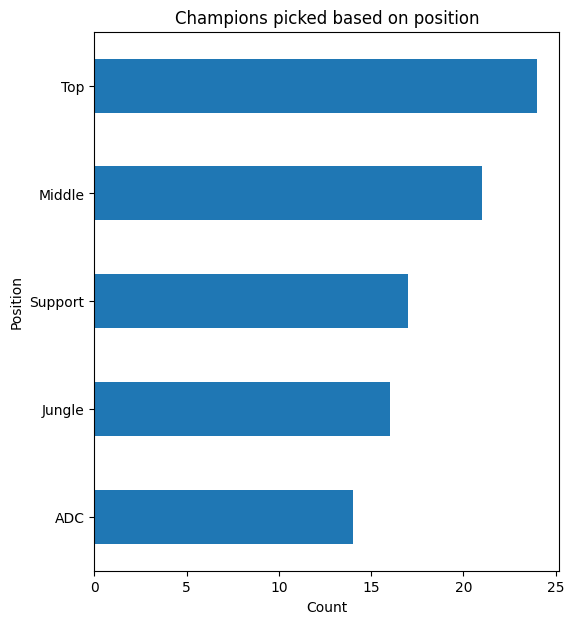

In [10]:
pos_count = lol_df['Pos'].value_counts()

pos_count.plot.barh(figsize=(6,7)).invert_yaxis()
plt.ylabel('Position')
plt.xlabel('Count')
plt.title('Champions picked based on position')

Based on the graph, we can see that there were a lot more champions, in terms of variety and not games played, that were pick for the Top position. On the other hand, ADC had the lowest variety in terms of champions picked. Specifically, there are 24 entries for the Top position, 21 entries for Middle, 17 for Support, 16 for Jungle, and 14 for ADC which totals at 92 entries all in all.

In order to determine which Position is capable of doing the most damage in a team, we will be comparing them by their `DMG%` variable. We have 2 main options in this scenario, we can either use the mean or the median. For now we will be getting both of them, along with the standard deviation of the `DMG%` variable. We will first do this for the entire data set and then repeat the process again but with each record grouped by their `Pos` variable. 

In [53]:
from IPython.display import display_html 

lol_mean_median_std = lol_df.agg({"DMG%": ["mean", "median", "std"]})
overall_DMG = lol_mean_median_std.style.set_table_attributes("style='display:inline'").set_caption('Overall DMG%')

Pos_mean_median_std = lol_df.groupby('Pos')['DMG%'].agg(["mean", "median", "std"])
Pos_mean_median_std.reset_index(inplace=True)
pos_DMG = Pos_mean_median_std.style.hide(axis='index').set_table_attributes("style='display:inline'").set_caption('DMG% by Position')

space = "\xa0" * 50 #spacing between the tables

display_html(overall_DMG._repr_html_() + space + pos_DMG._repr_html_(), raw=True)

Overall DMG% 
 
 
   
 DMG% 
 
 
 
 
 mean 
 20.106522 
 
 
 median 
 20.300000 
 
 
 std 
 8.338917 
 
 
 
                                                  
 
 DMG% by Position 
 
 
 Pos 
 mean 
 median 
 std 
 
 
 
 
 ADC 
 24.864286 
 24.050000 
 6.551994 
 
 
 Jungle 
 16.256250 
 15.850000 
 5.260161 
 
 
 Middle 
 25.295238 
 22.100000 
 6.516324 
 
 
 Support 
 8.705882 
 7.100000 
 4.189641 
 
 
 Top 
 23.433333 
 23.450000 
 5.233809

Based on the results, we can see that the `DMG%` of our dataset has a mean of 20.10, a median of 20.30 and a standard deviation of 8.33. Grouping the entries by their `Pos` variable, we see that the Middle category has the highest mean among the 5 positions. However, if we were to base it on the median, then ADC would have the highest `DMG%`. The standard deviation is also useful and will be used later on in the analysis. In order to determine which statistic is appropriate in representing the group, we will look into the dstirbution of each of the groups. 

The next thing we can do is to analyze the histogram of each `Pos` based on their `DMG%` variable. Doing so will provide us with an idea of each of their respcetive distributions shapes. 

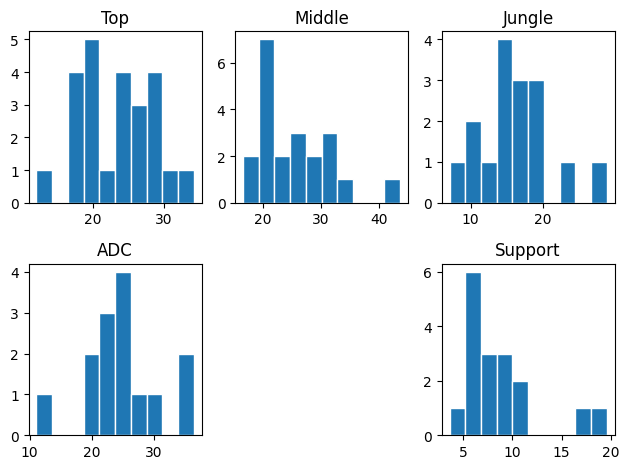

In [13]:
top_df = lol_df.loc[lol_df["Pos"] == "Top", 'DMG%']
middle_df = lol_df.loc[lol_df["Pos"] == "Middle", 'DMG%']
jungle_df = lol_df.loc[lol_df["Pos"] == "Jungle", 'DMG%']
adc_df = lol_df.loc[lol_df["Pos"] == "ADC", 'DMG%']
support_df = lol_df.loc[lol_df["Pos"] == "Support", 'DMG%']

plt.subplot(2,3,1)
plt.hist(top_df, edgecolor='w')
plt.title('Top')

plt.subplot(2,3,2)
plt.hist(middle_df, edgecolor='w')
plt.title('Middle')

plt.subplot(2,3,3)
plt.hist(jungle_df, edgecolor='w')
plt.title('Jungle')

plt.subplot(2,3,4)
plt.hist(adc_df, edgecolor='w')
plt.title('ADC')

plt.subplot(2,3,6)
plt.hist(support_df, edgecolor='w')
plt.title('Support')

plt.tight_layout()

The histograms show that results for Top, Jungle, and ADC take the form of a somewhat normal distribution while the histograms for Middle and Support roles are positvely skewed. Knowing the shape of the ditribution is important as it allows us to determine the appropriate measure of central tendency that we should use in order to describe the data.

We can also use a boxplot in order to better compare `DMG%` by `Pos`. With a box plot, we are able to see the maximum, minimum, first quartile, third quartile, and the median of each. The box plot also shows the outliers for each category.

<AxesSubplot: title={'center': 'DMG%'}, xlabel='Pos'>

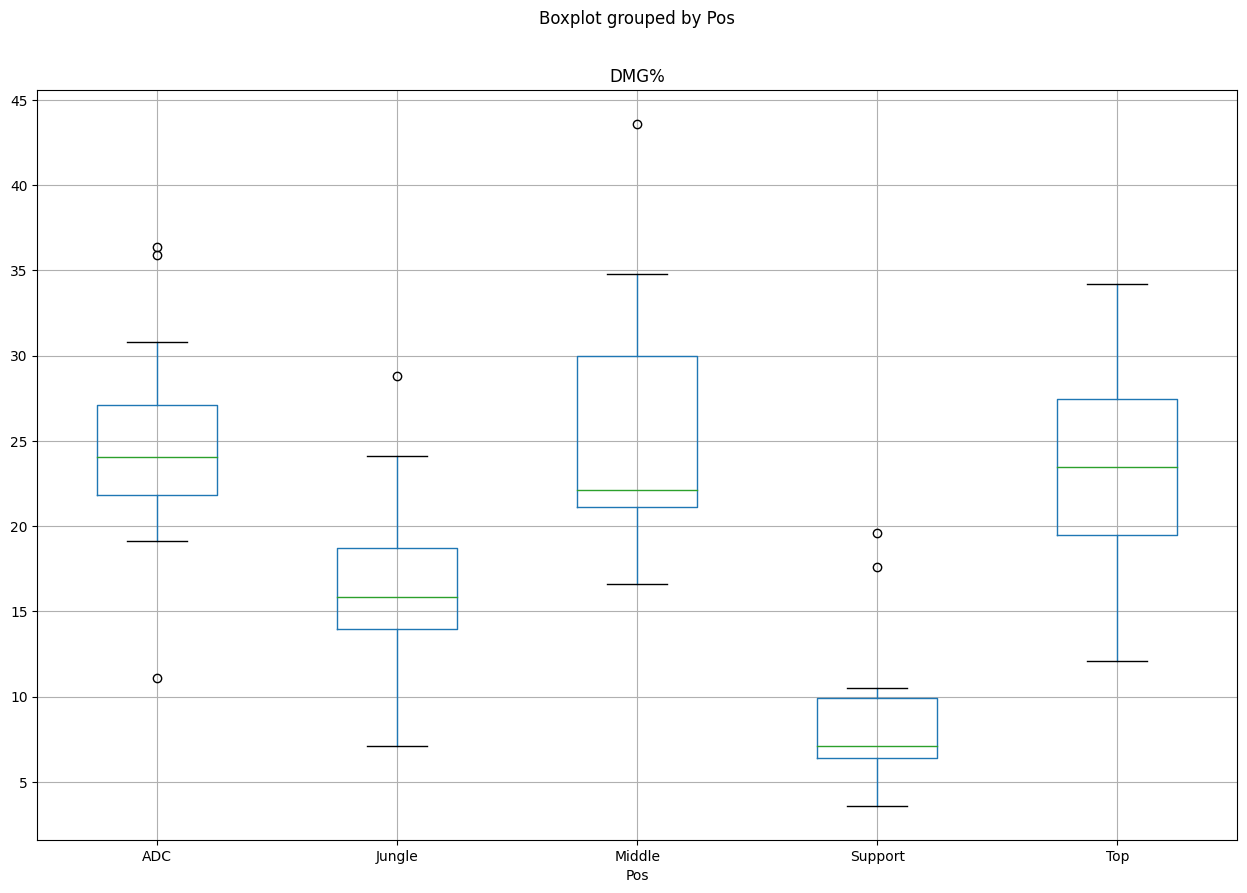

In [12]:
lol_df.boxplot("DMG%", by="Pos", figsize=(15,10))

With the boxplot, we are able to better visualize the data. Based on the results, we can confirm that ADC, Jungle, and Top have relatively normal distribution while both Middle and Support have skewed distribution.

From this, we can assume that it would be best to use the median as the measure of central tendency for both the Middle and Support categories since it is advised that the median be used with groups that are skewed. For ADC, Jungle and Top, any of the three measures of central tendency (mean, meadian, mode) can be used since they are all normally distributed and thus we will also use the median for these 3 categories. 

There are also outliers present but since they are relatively few for each category, we will not perform any operations on them. 

**ANSWER:** Based on the stastitics that we computed for earlier, and the histograms/box plots that we produced, we can say that the position capable of doing the most damage share in a team is the `ADC` position since it has the highest median among the group. In light of this, it is advised for teams to target the enemy ADC first while priotizing their own ADC in team fights. Once the ADC has been defeated, the next position that deals the most damage share would be `Top`, followed by `Middle`, then `Jungle`, and lastly `Support`. Taking out the enemy champions in this order will greatly decrease the fighting power of the enemy team. 